# Climate Segmentation Scaling Analysis

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
plt.rcParams['font.size'] = 16
plt.rcParams['lines.markersize'] = 14
plt.rcParams['lines.linewidth'] = 2

In [18]:
data = pd.read_csv('../run_scripts/scaling_results_003.txt', delim_whitespace=True)

In [19]:
# Compute throughputs
train_throughput = data.n_steps * data.batch_size / data.train_time
data = data.assign(train_throughput=train_throughput)

In [20]:
data

,n_workers,train_time,n_steps,batch_size,peak_flops,sust_flops,train_throughput
0,1,483.994,32,1,1.303,1.230,0.066117
1,2,494.437,32,2,2.652,2.405,0.129440
2,4,494.949,32,4,5.218,4.668,0.258613
3,8,498.743,32,8,10.938,9.685,0.513290
4,16,499.781,32,16,21.354,19.679,1.024449
5,32,504.642,32,32,41.009,38.511,2.029161
6,64,513.369,32,64,82.009,74.917,3.989333
7,128,515.670,32,128,168.794,152.273,7.943064
8,256,518.016,32,256,324.992,303.142,15.814183


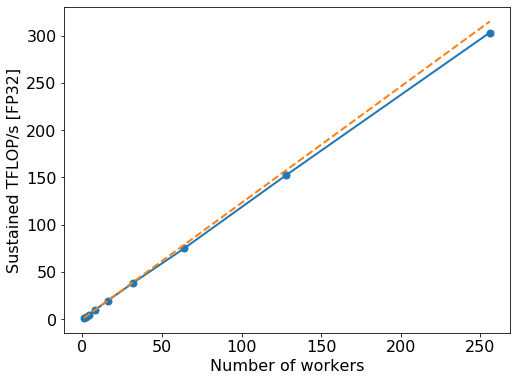

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.sust_flops, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.sust_flops.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Sustained TFLOP/s [FP32]');

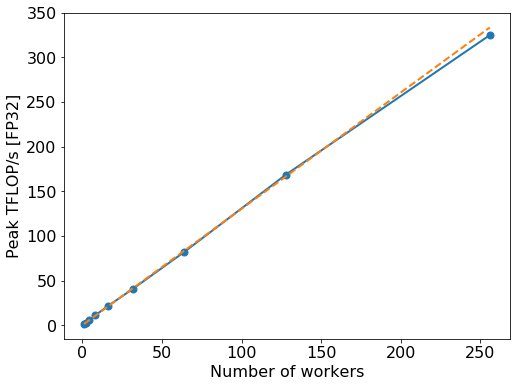

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.peak_flops, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.peak_flops.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Peak TFLOP/s [FP32]');

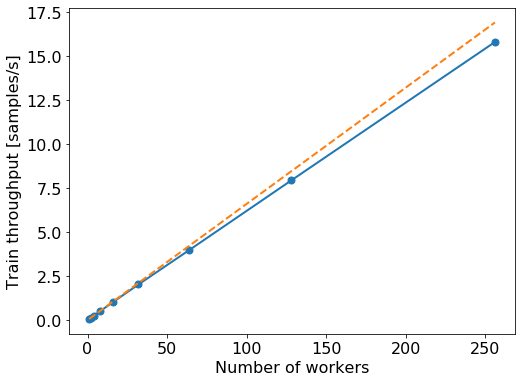

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.train_throughput, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.train_throughput.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Train throughput [samples/s]');

In [24]:
scaling_eff = data.train_throughput / (data.n_workers * data.train_throughput.loc[0])

In [25]:
data[['n_workers', 'train_throughput']].assign(eff=scaling_eff)

,n_workers,train_throughput,eff
0,1,0.066117,1.000000
1,2,0.129440,0.978879
2,4,0.258613,0.977866
3,8,0.513290,0.970428
4,16,1.024449,0.968412
5,32,2.029161,0.959084
6,64,3.989333,0.942780
7,128,7.943064,0.938573
8,256,15.814183,0.934322
